## **Bank churn prediction** 

Aims: 
* YO

### **----------------------------------  1. Data collection  -----------------------------------**

In [1]:
# Importing project dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data through API 
# !kaggle datasets download -d kmalit/bank-customer-churn-prediction

In [3]:
# Loading data into dataframe 
data = pd.read_csv('../Data/Churn_Modelling.csv')

### **----------------------------------  2. Data pre-processing  -----------------------------------**

In [4]:
# Viewing dataset shape
data.shape

(10000, 14)

In [5]:
# Unique count for each variable
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
# Check variable data types
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# 2nd check for number of null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Dropping columns that arent needed 
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
# removing potential capital letters and spaces in column headers
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ','_')

In [11]:
# Viewing first 5 rows of dataframe
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **----------------------------------  3. Exploratory data analysis  -----------------------------------**

In [12]:
amount_retained = data[data['exited'] == 0]['exited'].count() / data.shape[0] * 100
amount_lost = data[data['exited'] == 1]['exited'].count() / data.shape[0] * 100

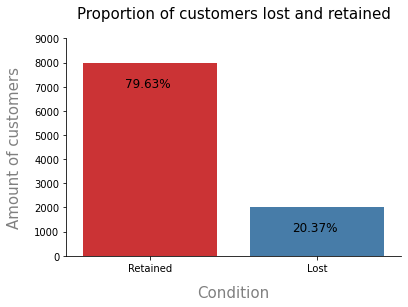

In [22]:
fig, ax = plt.subplots()
sns.countplot(x='exited', palette="Set1", data=data)
plt.xticks([0, 1], ['Retained', 'Lost'])
plt.xlabel('Condition', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of customers', size=15, labelpad=12, color='grey')
plt.title("Proportion of customers lost and retained", size=15, pad=20)
plt.ylim(0, 9000)
plt.text(-0.15, 7000, f"{round(amount_retained, 2)}%", fontsize=12)
plt.text(0.85, 1000, f"{round(amount_lost, 2)}%", fontsize=12)
sns.despine()
plt.show()

In [13]:
# Exploratory data analysis

# Reading csv into df
df = pd.read_csv("Bankchurners.csv")

# Viewing first 10 rows
# df.head(10)

# Viewing data types 
# print(df.dtypes)

# .info() is the best way to see compact list of columns and types 
df.info() # No null values found  

# The data fall under two categories:
# Categorical features: Gender, Card_category, Education_Level etc.
# Numerical features: Dependent_count, Months_on_book, Credit_Limit etc.


# The Attrition_Flag column is string with Attrited Customer/Existing Customer values. We convert it to integer to make it easier to use in our analysis.
df.loc[df.Attrition_Flag=='Existing Customer','Attrition_Flag'] = 0 
df.loc[df.Attrition_Flag=='Attrited Customer','Attrition_Flag'] = 1


FileNotFoundError: [Errno 2] No such file or directory: 'Bankchurners.csv'

# **Gender**

In [ ]:
# Defining a new df (df_plot) grouped by Gender. Finding the AVG value in Attrition_Flag column, telling us the Churn rate. 
# (.reset_index) When we reset the index, the old index is added as a column, and a new sequential index is used or when there is no index it creates one. 
# Without the .reset_index() the df would just be a series, with it, it is a dataframe
df_plot = df.groupby('Gender').Attrition_Flag.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['Gender'],
        y=df_plot['Attrition_Flag'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Gender',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

df_plot



,Gender,Attrition_Flag
0,F,0.173572
1,M,0.146152


### Female customers are more likely to churn vs. male customers, but the difference is not that substantial(~2.74%).

# **Education_Level**

In [ ]:
df_plot = df.groupby('Education_Level').Attrition_Flag.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['Education_Level'],
        y=df_plot['Attrition_Flag'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Education_Level',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

df_plot

,Education_Level,Attrition_Flag
0,College,0.152024
1,Doctorate,0.210643
2,Graduate,0.155691
3,High School,0.152012
4,Post-Graduate,0.178295
5,Uneducated,0.159381
6,Unknown,0.168532
